In [1]:
# a
import urllib.request
import cv2
import numpy as np

url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/digits.png"


def load_digits_image(url):
    response = urllib.request.urlopen(url)
    image_data = response.read()
    image_array = np.asarray(bytearray(image_data), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Failed to load image")
    else:
        print("Image loaded successfully, shape:", image.shape)
    return image


digits_img = load_digits_image(url)
digit_height, digit_width = 20, 20

n_digits_width = 100
n_digits_height = 50

digits = []
labels = []

for i in range(n_digits_height):
    for j in range(n_digits_width):
        x = j * digit_width
        y = i * digit_height
        digit = digits_img[y:y + digit_height, x:x + digit_width]
        digits.append(digit)
        labels.append(i // 5)

print(f"Total digits extracted: {len(digits)}")
print(f"labels: {labels[:5000]}")


Image loaded successfully, shape: (1000, 2000)
Total digits extracted: 5000
labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [2]:
#b
import urllib.request
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/digits.png"


def load_digits_image(url):
    response = urllib.request.urlopen(url)
    image_data = response.read()
    image_array = np.asarray(bytearray(image_data), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Failed to load image")
    else:
        print("Image loaded successfully, shape:", image.shape)
    return image


digits_img = load_digits_image(url)
digit_height, digit_width = 20, 20

n_digits_width = 100
n_digits_height = 50

digits = []
labels = []

for i in range(n_digits_height):
    for j in range(n_digits_width):
        x = j * digit_width
        y = i * digit_height
        digit = digits_img[y:y + digit_height, x:x + digit_width]
        digits.append(digit)
        labels.append(i // 5)

digits = np.array(digits)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    digits, labels, test_size=0.20, random_state=42)

# Output the size of each set to verify
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Image loaded successfully, shape: (1000, 2000)
Training set size: 4000
Testing set size: 1000


In [3]:
# d and e
import urllib.request
import cv2
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/digits.png"


def load_digits_image(url):
    response = urllib.request.urlopen(url)
    image_data = response.read()
    image_array = np.asarray(bytearray(image_data), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Failed to load image")
    else:
        print("Image loaded successfully, shape:", image.shape)
    return image


digits_img = load_digits_image(url)
digit_height, digit_width = 20, 20

n_digits_width = 100
n_digits_height = 50

digits = []
labels = []

for i in range(n_digits_height):
    for j in range(n_digits_width):
        x = j * digit_width
        y = i * digit_height
        digit = digits_img[y:y + digit_height, x:x + digit_width]
        digits.append(digit)
        labels.append(i // 5)

digits = np.array(digits)
labels = np.array(labels)

digits_flattened = np.array([digit.flatten() for digit in digits])

X_train, X_test, y_train, y_test = train_test_split(
    digits_flattened, labels, test_size=0.20, random_state=42)

pipeline = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=100, solver='lbfgs'))

ovr_model = OneVsRestClassifier(pipeline)

ovr_model.fit(X_train, y_train)

accuracy = ovr_model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100}")


Image loaded successfully, shape: (1000, 2000)
Accuracy: 89.9


Image loaded successfully, shape: (1000, 2000)
Accuracy: 89.9


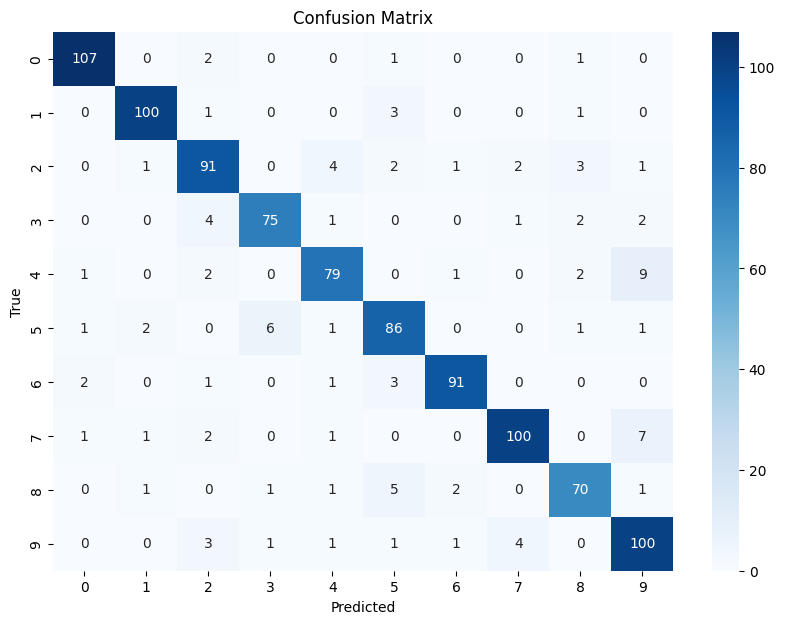

In [4]:
#f
import urllib.request
import cv2
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/digits.png"


def load_digits_image(url):
    response = urllib.request.urlopen(url)
    image_data = response.read()
    image_array = np.asarray(bytearray(image_data), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Failed to load image")
    else:
        print("Image loaded successfully, shape:", image.shape)
    return image


digits_img = load_digits_image(url)

digit_height, digit_width = 20, 20

n_digits_width = 100
n_digits_height = 50

digits = []
labels = []

for i in range(n_digits_height):
    for j in range(n_digits_width):
        x = j * digit_width
        y = i * digit_height
        digit = digits_img[y:y + digit_height, x:x + digit_width]
        digits.append(digit)
        labels.append(i // 5)

digits = np.array(digits)
labels = np.array(labels)

digits_flattened = np.array([digit.flatten() for digit in digits])

X_train, X_test, y_train, y_test = train_test_split(
    digits_flattened, labels, test_size=0.20, random_state=42)


pipeline = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=100, solver='lbfgs'))

ovr_model = OneVsRestClassifier(pipeline)

ovr_model.fit(X_train, y_train)

accuracy = ovr_model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100}")

y_pred = ovr_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[
            i for i in range(10)], yticklabels=[i for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
